In [1]:
#this is for plotting images 
import matplotlib.pyplot as plt
#this is for dealing with images and pixels
from PIL import Image
import numpy as np 
import cv2


In [2]:
def dilationOrErosion(blue_channel,green_channel,red_channel,img,length,width,makeDilation):
    img_array = np.asarray(img)
    leftDist=int(width/2)
    upDist=int(length/2)
    newImgB=np.zeros((blue_channel.shape))
    newImgG=np.zeros((green_channel.shape))
    newImgR= np.zeros((red_channel.shape))

    
    for i in range(leftDist,img_array.shape[0]-leftDist):
        for j in range(upDist,img_array.shape[1]-upDist): 
                   
                    if(makeDilation):
                        maxB, maxG, maxR=getMaxOrMin(blue_channel,green_channel,red_channel,i-leftDist,i+leftDist+1,j-upDist,j+upDist+1,length,width,True)
                        newImgB[i][j] += maxB
                        newImgG[i][j] += maxG
                        newImgR[i][j] += maxR
                    else:
                        minB, minG, minR=getMaxOrMin(blue_channel,green_channel,red_channel,i-leftDist,i+leftDist+1,j-upDist,j+upDist+1,length,width,False)
                        newImgB[i][j] += minB
                        newImgG[i][j] += minG
                        newImgR[i][j] += minR
     
    return newImgR, newImgG, newImgB
                   

In [3]:
def getMaxOrMin(blue_channel,green_channel,red_channel,starti,endi,startj,endj,LStrElem,WStrElem,getMax):
    
    outputBlue=np.zeros(WStrElem*LStrElem)
    outputGreen=np.zeros(WStrElem*LStrElem)
    outputRed=np.zeros(WStrElem*LStrElem)
    
    index=0
    for k in range(starti,endi):
        for m in range(startj,endj):
            outputRed[index]+=red_channel[k][m]
            outputGreen[index]+=green_channel[k][m]
            outputBlue[index]+=blue_channel[k][m]
            index+=1
    if(getMax):
        return max(outputBlue),max(outputGreen),max(outputRed)
    else:
        return min(outputBlue),min(outputGreen),min(outputRed)
            

In [4]:
def opening(blue_channel, green_channel, red_channel,img,length,width):
    red ,green, blue=dilationOrErosion(blue_channel, green_channel, red_channel,img,length,width,False)
    rimg = Image.fromarray(red).convert('L')
    bimg = Image.fromarray(blue).convert('L')
    gimg = Image.fromarray(green).convert('L')
    eroded_img = Image.merge("RGB", [rimg, gimg, bimg])
    r,g,b = dilationOrErosion(blue, green, red, eroded_img, length, width, True)
    rr = Image.fromarray(r).convert('L')
    bb = Image.fromarray(b).convert('L')
    gg = Image.fromarray(g).convert('L')
    new_opening = Image.merge("RGB", [rr, gg, bb])
    opening_array = np.asarray(new_opening).astype('int16')
    return opening_array

In [5]:
def closing(blue_channel, green_channel, red_channel,img,length,width):

    red ,green, blue=dilationOrErosion(blue_channel, green_channel, red_channel,img,length,width,True)
    rimg = Image.fromarray(red).convert('L')
    bimg = Image.fromarray(blue).convert('L')
    gimg = Image.fromarray(green).convert('L')
    dilated_img = Image.merge("RGB", [rimg, gimg, bimg])
    r,g,b = dilationOrErosion(blue, green, red, dilated_img, length, width, False)
    rr = Image.fromarray(r).convert('L')
    bb = Image.fromarray(b).convert('L')
    gg = Image.fromarray(g).convert('L')
    eroded_img = Image.merge("RGB", [rr, gg, bb])
    eroded_array = np.array(eroded_img).astype('int16')
    return eroded_array

In [6]:
img = Image.open("Mars.jpg")
rgb_array = np.asarray(img)

In [7]:
red_channel, green_channel , blue_channel = img.split()

In [8]:
red_channel = np.array(red_channel)
blue_channel = np.array(blue_channel)
green_channel = np.array(green_channel)

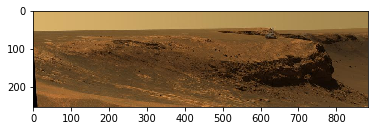

In [12]:
plt.imshow(img)

## Deliverables

### Structuring Element: 3x3 with a=1, b=1

In [9]:
opened = opening(blue_channel, green_channel, red_channel,rgb_array,3,3)
closed =closing(blue_channel, green_channel, red_channel,rgb_array,3,3)

In [10]:
contrast_311 = np.zeros((rgb_array.shape), dtype='int16')
contrast_311 = rgb_array + ((rgb_array -opened) - (closed-rgb_array))
contrast_311 = np.clip(contrast_311, 0,255)
contrast_311 = contrast_311.astype('uint8')

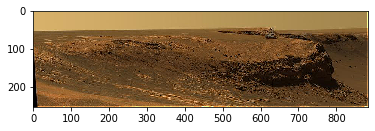

In [22]:
plt.imshow(contrast_311)

In [28]:
incContrast_311=Image.fromarray(contrast_311)
incContrast_311.save('incContrast_311.jpg')

### Structuring Element: 3x3 with a=1, b=5

In [13]:
a = 1
b = 5
contrast_315 = np.zeros((rgb_array.shape), dtype='int16')
contrast_315 = rgb_array + ((a*(rgb_array -opened)) - (b*(closed-rgb_array)))
contrast_315 = np.clip(contrast_315, 0,255)
contrast_315 = contrast_315.astype('uint8')

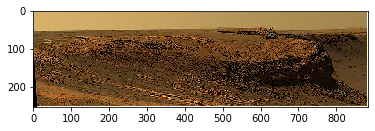

In [14]:
plt.imshow(contrast_315)

In [25]:
incContrast_315=Image.fromarray(contrast_315)
incContrast_315.save('incContrast_315.jpg')

### Structuring Element: 3x3 with a=5, b=1

In [15]:
a = 5
b = 1
contrast_351 = np.zeros((rgb_array.shape), dtype='int16')
rgb_o = a*(rgb_array -opened)
rgb_c = b * (closed-rgb_array)
contrast_351 = rgb_array + (np.clip(rgb_o,0,255)) - (np.clip(rgb_c,0,255))
contrast_351 = np.clip(contrast_351, 0,255)
contrast_351 = contrast_351.astype('uint8')

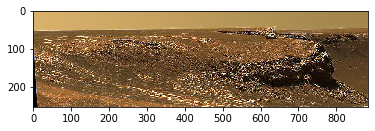

In [16]:
plt.imshow(contrast_351)

In [26]:
incContrast_351=Image.fromarray(contrast_351)
incContrast_351.save('incContrast_351.jpg')

### Structuring Element: 9x9 with a=1, b=1

In [17]:
opened = opening(blue_channel, green_channel, red_channel,img,9,9)
closed = closing(blue_channel, green_channel, red_channel,img,9,9)

In [18]:
contrast_911 = np.zeros((rgb_array.shape), dtype='int16')
contrast_911 = rgb_array + ((rgb_array -opened) - (closed-rgb_array))
contrast_911 = np.clip(contrast_911, 0,255)
contrast_911 = contrast_911.astype('uint8')

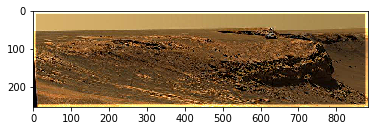

In [19]:
plt.imshow(contrast_911)

In [27]:
incContrast_911=Image.fromarray(contrast_911)
incContrast_911.save('incContrast_911.jpg')

# Question : Comment on the effect of increase the structuring element size on the output image?

when the size of the structuring element increases the contrast increase because the contrast for a structuring element of size 9*9 is more than the 3*3

# Question : Comment on the effect of increasing or decreasing a and b on the output image?

increasing the a makes the image bighter ,increasing the b makes the image darker 

# Suggest an expression that could decrease the contrast using morphological operators.

imgDecContrast = I - (a *(I - opened )) + (b * ( closed-I )) this will make the bright pixels that are the pixels with high values darker and pixels with low values brighter and this will decrease the contrast)